In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [84]:
df_covid = pd.read_csv("data/brazil_cities_coordinates.csv")
df_covid.head()

,state_code,city_code,city_name,lat,long,capital
0,52,5200050,Abadia de Goiás,-16.75730,-49.4412,False
1,31,3100104,Abadia dos Dourados,-18.48310,-47.3916,False
2,52,5200100,Abadiânia,-16.19700,-48.7057,False
3,31,3100203,Abaeté,-19.15510,-45.4444,False
4,15,1500107,Abaetetuba,-1.72183,-48.8788,False


In [85]:
df_covid.info()

<class 'pandas.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state_code  5570 non-null   int64  
 1   city_code   5570 non-null   int64  
 2   city_name   5570 non-null   str    
 3   lat         5570 non-null   float64
 4   long        5570 non-null   float64
 5   capital     5570 non-null   bool   
dtypes: bool(1), float64(2), int64(2), str(1)
memory usage: 223.1 KB


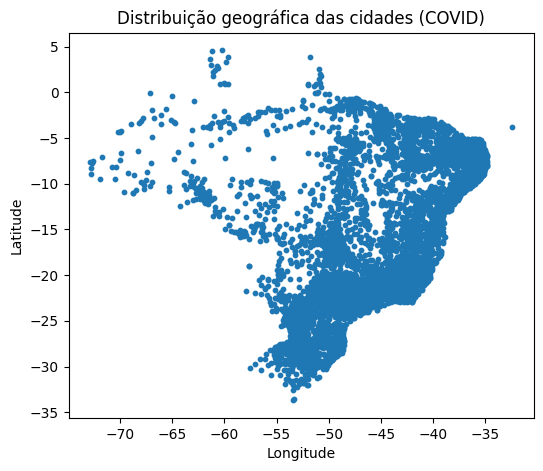

In [86]:
plt.figure(figsize=(6,5))
plt.scatter(
    df_covid["long"],
    df_covid["lat"],
    s=10
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribuição geográfica das cidades (COVID)")
plt.show()


In [87]:
def plot_all_hist(df_covid, title_prefix=""):
    num_cols = df_covid.select_dtypes(include=[np.number]).columns
    n_cols = 2
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df_covid[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")

    plt.tight_layout()
    plt.show()

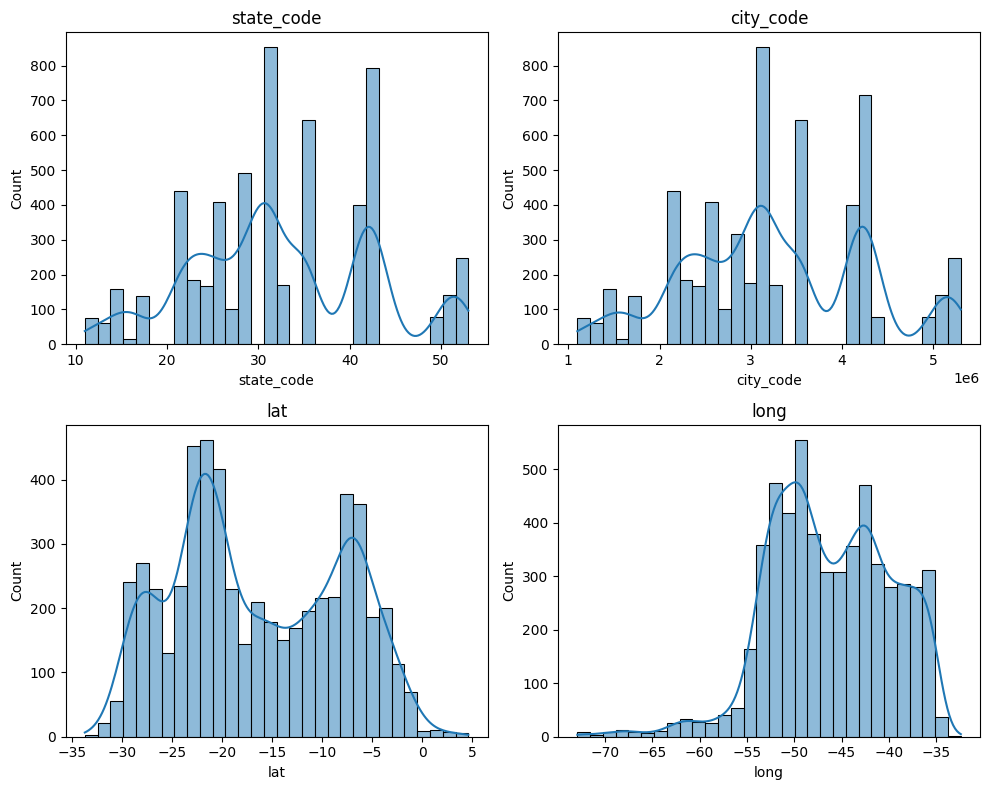

In [88]:
plot_all_hist(df_covid)

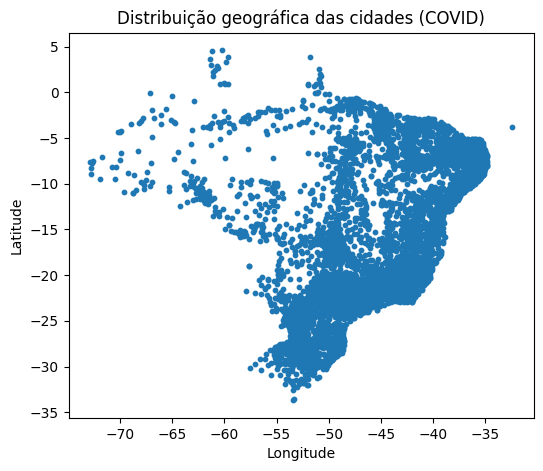

In [89]:
plt.figure(figsize=(6,5))
plt.scatter(
    df_covid["long"],
    df_covid["lat"],
    s=10
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribuição geográfica das cidades (COVID)")
plt.show()


## Preparação dos Dados

Para os métodos de clusterização e redução de dimensionalidade, foram selecionadas apenas as variáveis geográficas (`lat`, `long`). Os dados foram normalizados para evitar viés de escala.


In [90]:
X = df_covid[["lat", "long"]].values
X = (X - X.mean(axis = 0)) / X.std(axis = 0)

## PCA (Principal Component Analysis)

O PCA foi utilizado como técnica linear de redução de dimensionalidade, com o objetivo de analisar a variância dos dados e facilitar visualizações bidimensionais.

In [91]:
from sklearn.decomposition import PCA

pca_covid = PCA(n_components=2)
X_pca_covid = pca_covid.fit_transform(X)

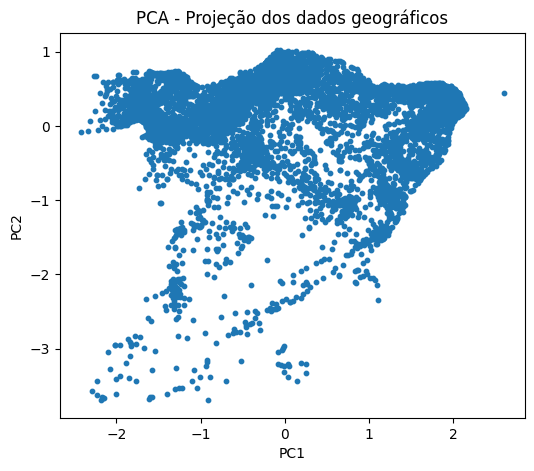

In [92]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca_covid[:,0], X_pca_covid[:,1], s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - Projeção dos dados geográficos")
plt.show()


## K-means - clusterização

In [93]:
# Escolhendo o número de clusters (K)
from sklearn.cluster import KMeans

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

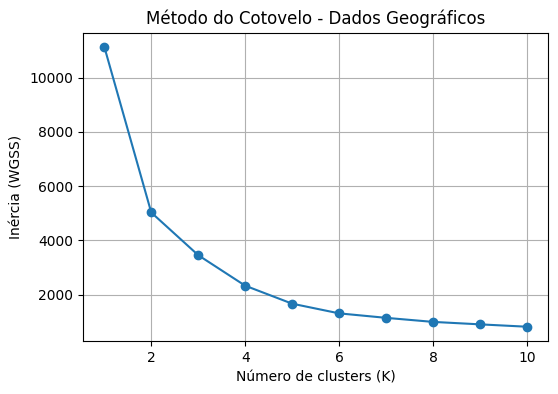

In [94]:
# Vizualização do método cotovelo para saber qual K deveremos usar
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertias, marker="o")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inércia (WGSS)")
plt.title("Método do Cotovelo - Dados Geográficos")
plt.grid(True)
plt.show()

In [95]:
kmeans_covid = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

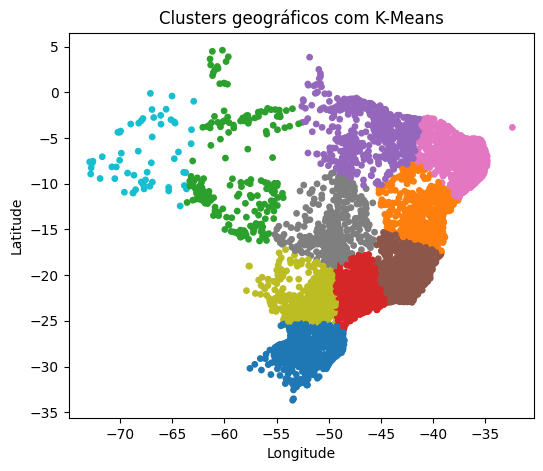

In [96]:
plt.figure(figsize=(6,5))
plt.scatter(
    df_covid["long"],
    df_covid["lat"],
    c=labels_kmeans,
    cmap="tab10",
    s=15
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters geográficos com K-Means")
plt.show()


## DBSCAN - Clusterização por Densidade

In [97]:
from sklearn.cluster import DBSCAN

In [98]:
dbscan_covid = DBSCAN(eps=0.3, min_samples=10)
labels_dbscan_covid = dbscan_covid.fit_predict(X)

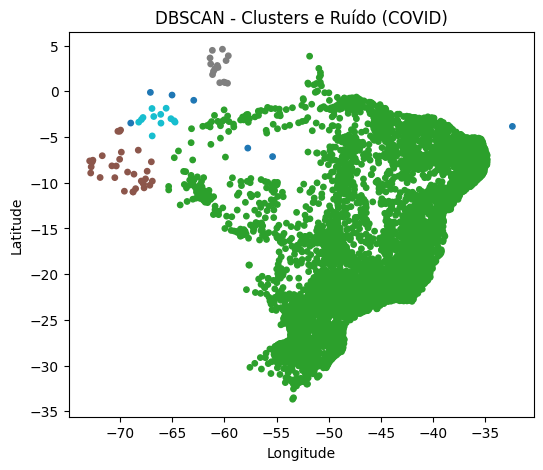

In [99]:
plt.figure(figsize=(6,5))
plt.scatter(
    df_covid["long"],
    df_covid["lat"],
    c=labels_dbscan_covid,
    cmap="tab10",
    s=15
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN - Clusters e Ruído (COVID)")
plt.show()


## Dedondograma - Clusterização Hieráquica

In [100]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [101]:
Z = linkage(X, method="ward")

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [12.5, 12.5, 61.875, 61.875],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [103.75, 103.75, 142.5, 142.5],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [123.125, 123.125, 173.75, 173.75],
  [37.1875, 37.1875, 148.4375, 148.4375],
  [205.0, 205.0, 215.0, 215.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [210.0, 210.0, 233.75, 233.75],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [305.0, 305.0, 323.75, 323.75],
  [290.0, 290.0, 314.375, 314.375],
  

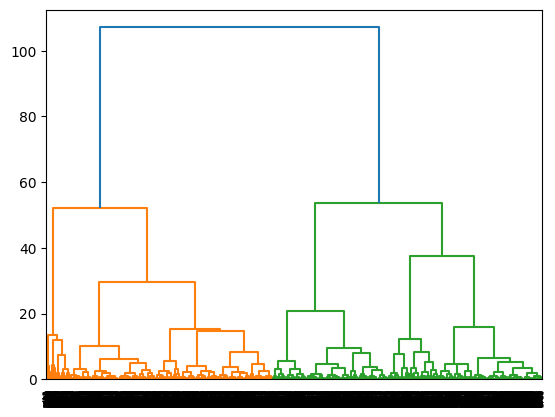

In [102]:
dendrogram(Z)

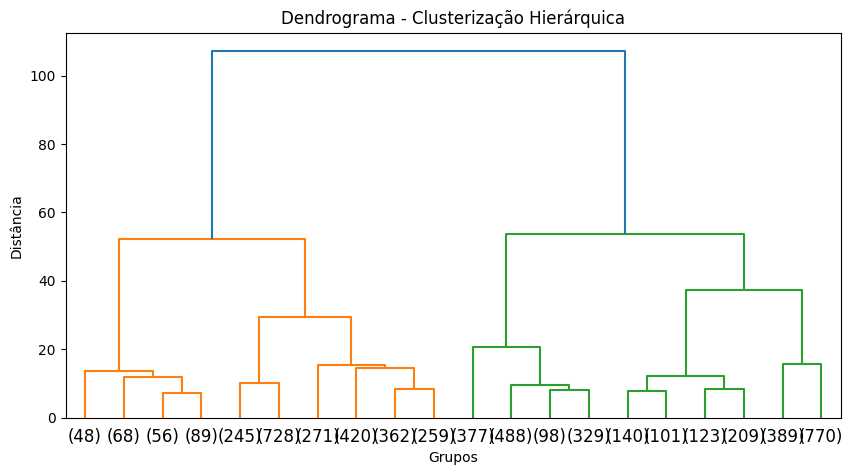

In [103]:
plt.figure(figsize=(10,5))
dendrogram(Z, truncate_mode="lastp", p=20)
plt.title("Dendrograma - Clusterização Hierárquica")
plt.xlabel("Grupos")
plt.ylabel("Distância")
plt.show()


## t-SNE - Vizualização Não linear

In [104]:
from sklearn.manifold import TSNE

In [105]:
tsne_covid = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne_covid.fit_transform(X)

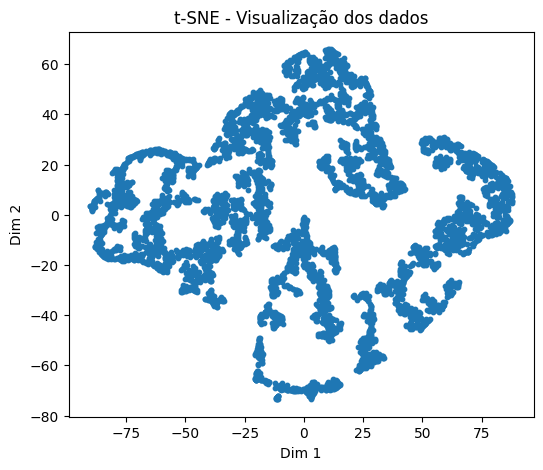

In [106]:
plt.figure(figsize=(6,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], s=10)
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.title("t-SNE - Visualização dos dados")
plt.show()

## UMAP - Vizualização + Estrutura Global

Durante o desenvolvimento das análises de redução de dimensionalidade (UMAP), foi necessário ajustar a compatibilidade entre bibliotecas científicas. Embora versões recentes do NumPy (≥ 2.x) estejam disponíveis, pacotes fundamentais como SciPy e Numba ainda não oferecem suporte completo a essas versões. Dessa forma, optou-se pelo uso do NumPy 1.26.4, garantindo estabilidade, compatibilidade e reprodutibilidade das análises com UMAP, PCA e t-SNE.


In [109]:
import umap

ImportError: Numba needs NumPy 1.26 or less

In [108]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X)

NameError: name 'umap' is not defined